In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from IPython.display import HTML

import plotly.express as px

import warnings

warnings.filterwarnings('ignore')

In [5]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [6]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [7]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [8]:
exercise_df = exercise.merge(calories, on = "User_ID")

exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [9]:
print("This dataset has", exercise_df.shape[0]," instances and ", exercise_df.shape[1],"columns.")

This dataset has 15000  instances and  9 columns.


In [10]:
exercise_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [11]:
print("Columns:")
for i, column in enumerate(exercise_df.columns):
    print("\t", i + 1, ".", column)


Columns:
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [12]:
exercise_df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

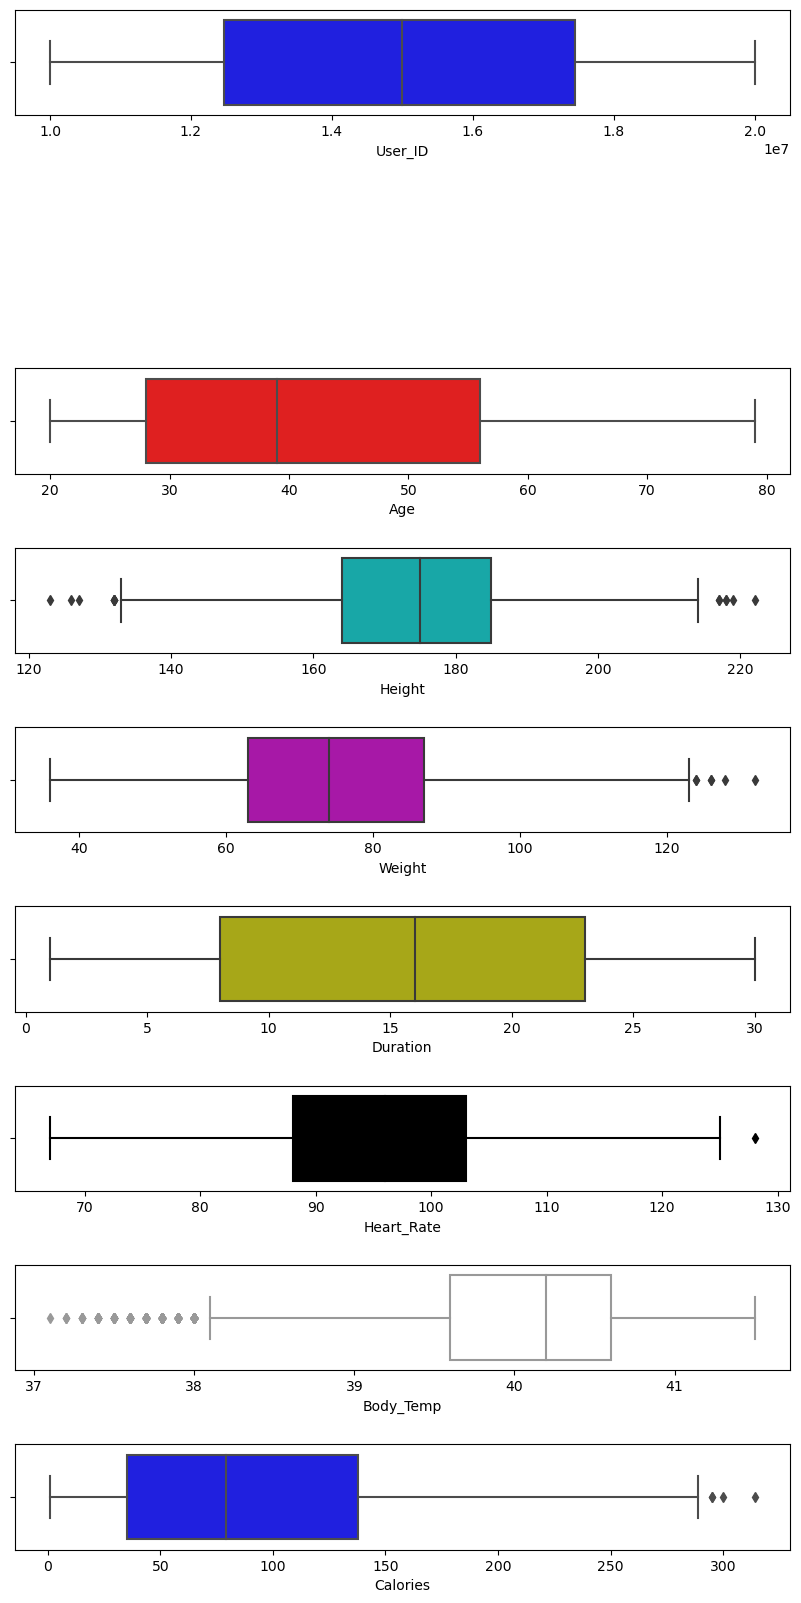

In [13]:
c = ['b','g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']

fig1, axes = plt.subplots (len(exercise_df.columns), 1, figsize = (10, 20))

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

axes = axes.flatten() 
for i, column in zip(range(len(exercise_df.columns)), exercise_df.columns):

   try:

    sns.boxplot(data = exercise_df, x = column, color = c[i], ax = axes[i])

   except:

    fig1.delaxes(axes[i])

    continue

In [14]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


<Axes: >

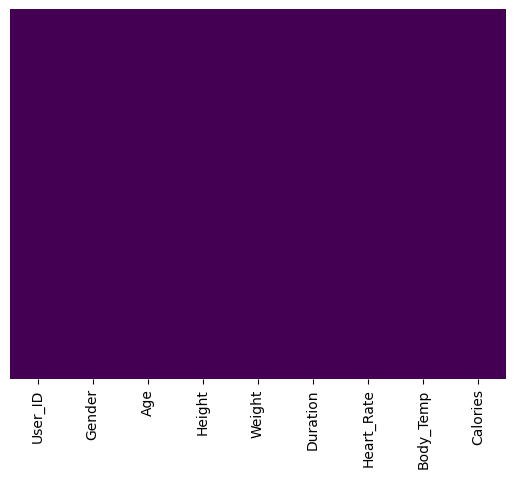

In [15]:
sns.heatmap(exercise_df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [16]:
print("The shape of dataset before dropping duplicates:", exercise_df.shape)

exercise_df.drop_duplicates (subset = ['User_ID'], keep='last', inplace = True)

print("The shape of dataset after dropping duplicates :" ,exercise_df.shape)

The shape of dataset before dropping duplicates: (15000, 9)
The shape of dataset after dropping duplicates : (15000, 9)


In [17]:
exercise_df.drop(columns = "User_ID", inplace = True)

In [18]:
from sklearn.model_selection import train_test_split


exercise_train_data, exercise_test_data = train_test_split(exercise_df, test_size = 0.2, random_state = 1)

print("Shape of training data :" , exercise_train_data.shape)

print("Shape of test data:" ,exercise_test_data.shape)

Shape of training data : (12000, 8)
Shape of test data: (3000, 8)


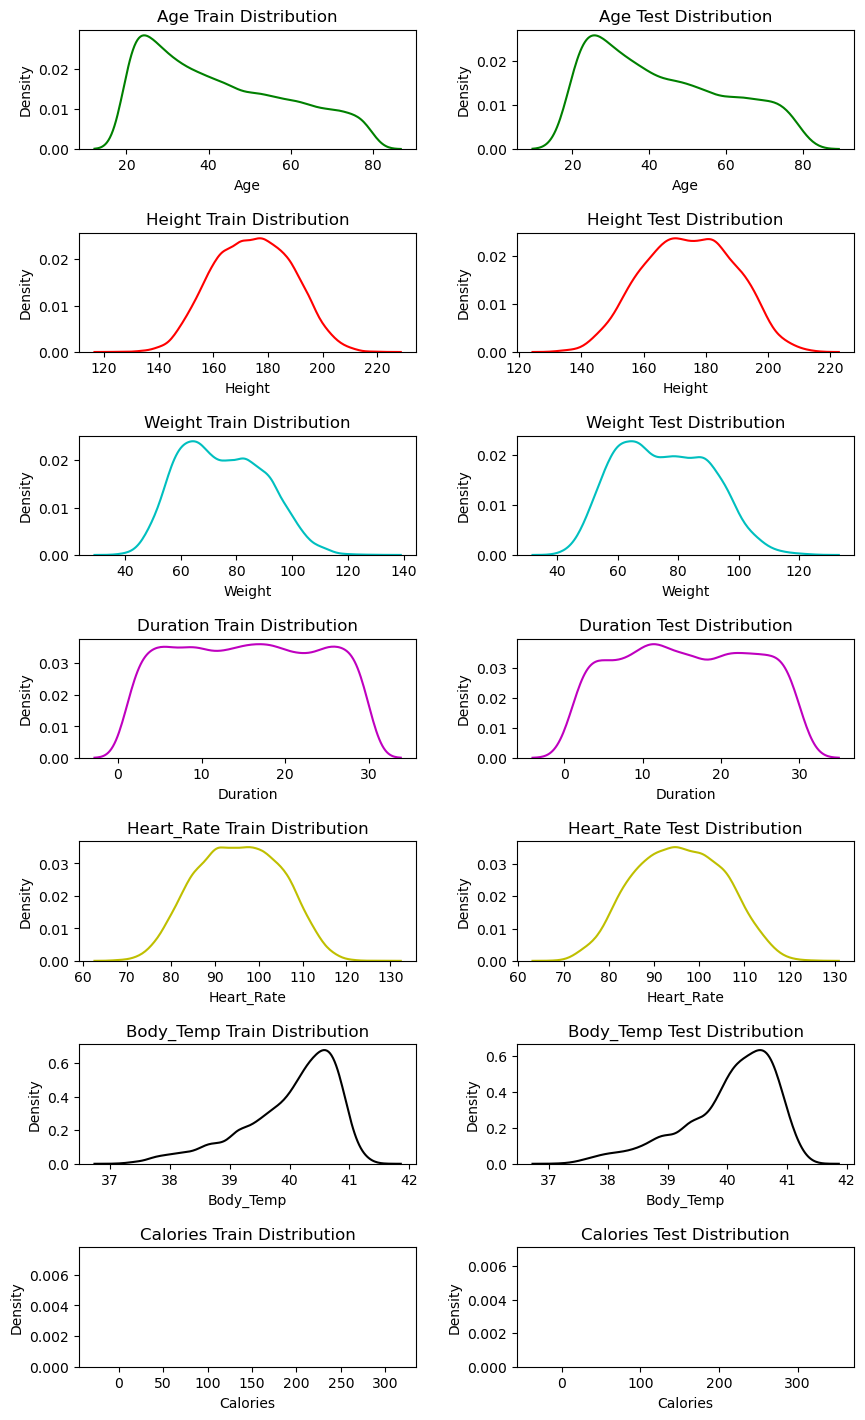

In [19]:


c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']

fig1, axes = plt.subplots(len(exercise_train_data.columns), 2, figsize=(10, 20))

plt.subplots_adjust(wspace=0.3, hspace=0.7)

axes = axes.flatten()  

for i, column, color in zip(range(0, len(exercise_train_data.columns) *2 , 2), exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column + " Train Distribution")
        sns.kdeplot(data=exercise_train_data, x=column, ax=axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue

for i, column, color in zip(range(1, len(exercise_train_data.columns) *2 , 2), exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column + " Test Distribution")
        sns.kdeplot(data = exercise_test_data, x = column, ax = axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue
plt.show()

In [20]:
print(exercise_train_data.columns.tolist())

['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


In [21]:
print(exercise_train_data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')


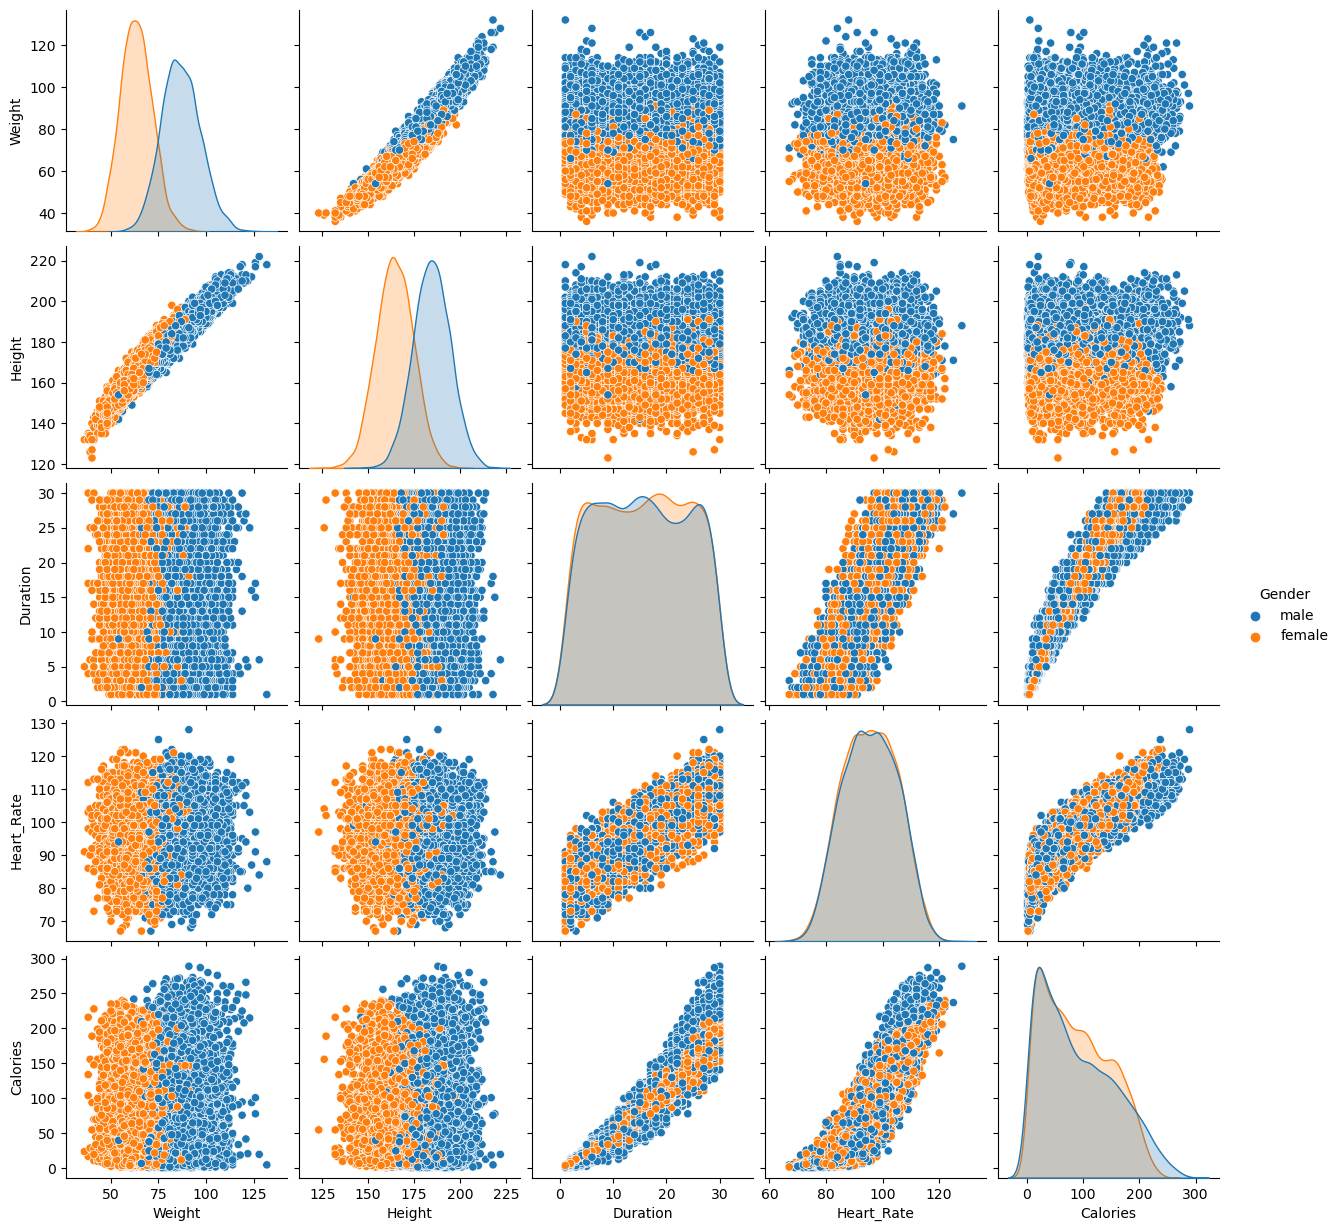

In [23]:
#sns.pairplot(exercise_train_data[['Weight_x','Height_x' ,'Duration_x' ,'Heart_Rate_x' , 'Calories','Gender_x' ]],hue = 'Gender_x')
sns.pairplot(exercise_train_data[['Weight', 'Height', 'Duration', 'Heart_Rate', 'Calories', 'Gender']], hue='Gender')


In [25]:
#print('Minimum age in dataset is: ',exercise_train_data['Age_x'].min()) 
#print('Maximum age in dataset is: ', exercise_train_data['Age_x'].max())



print('Minimum age in dataset is: ', exercise_train_data['Age'].min()) 
print('Maximum age in dataset is: ', exercise_train_data['Age'].max())


Minimum age in dataset is:  20
Maximum age in dataset is:  79


In [27]:
age_groups = ["Young", "Middle-Aged", "old"]

exercise_train_data["age_groups"] = pd.cut(exercise_train_data['Age'], bins =  [20, 40, 60, 80], right= False, labels = age_groups)

exercise_train_data["age_groups"].head()

2643             old
13352            old
13117            old
2560             old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'old']

In [28]:
exercise_train_data["age_groups"].value_counts()

Young          6029
Middle-Aged    3535
old            2436
Name: age_groups, dtype: int64

<Axes: xlabel='age_groups', ylabel='count'>

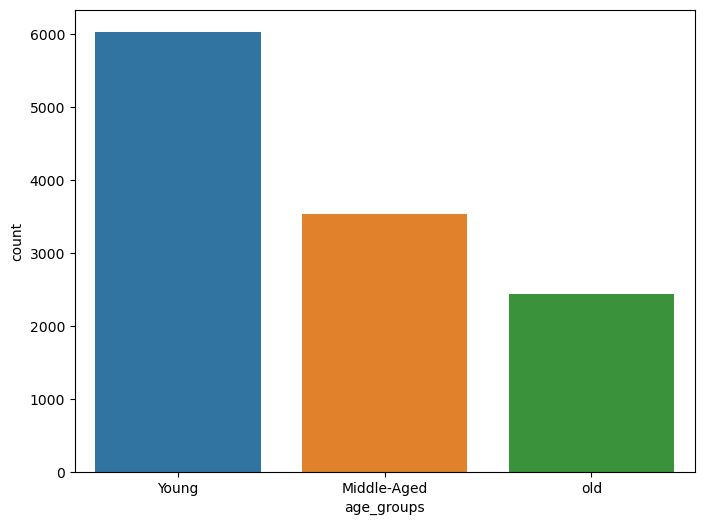

In [29]:
plt.rcParams["figure.figsize"] = 8,6

sns.countplot(data = exercise_train_data, x = "age_groups")

In [31]:
fig = px.box(exercise_train_data, x= "age_groups", y = "Calories", color = 'Gender')

fig.update_layout(

width=700,

height=450,

)

fig.show()

In [33]:
fig = px.box(exercise_train_data, x= "age_groups", y = 'Duration', color = 'Gender')

fig.update_layout(

width=750,

height=450,

)

fig.show()

In [35]:
print("dataset's median exercise duration in mins:", exercise_train_data['Duration'].median())

print("dataset's mean exercise duration in mins: ", exercise_train_data['Duration'].mean())

dataset's median exercise duration in mins: 16.0
dataset's mean exercise duration in mins:  15.520083333333334


<Axes: xlabel='Gender', ylabel='count'>

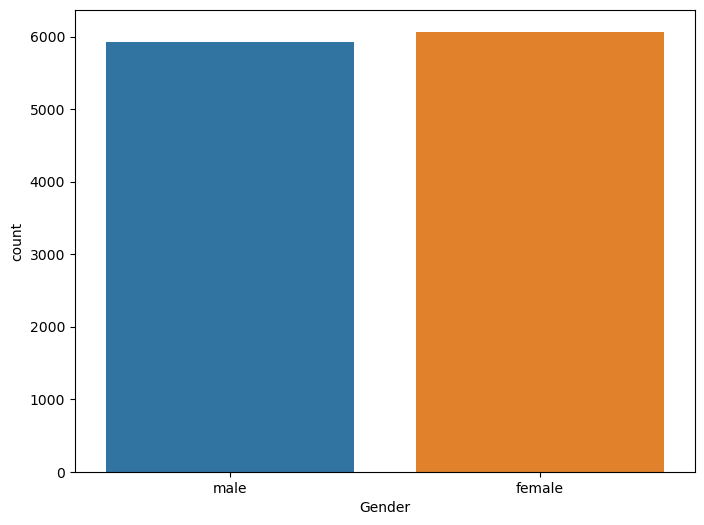

In [37]:
plt.rcParams["figure.figsize"] = 8, 6

sns.countplot(data = exercise_train_data, x="Gender")

In [39]:
fig = px.box(exercise_train_data, x= "Gender", y = "Duration")

fig.update_layout(

width=700,

height=450,
)

fig.show()

In [41]:
fig = px.box(exercise_train_data, x= "Gender", y = 'Heart_Rate')

fig.update_layout(

width=700,

height=450,
)

fig.show()

In [42]:
for data in [exercise_train_data, exercise_test_data]:

   data["BMI"] = data['Weight'] / ((data["Height"] / 100) ** 2)

   data["BMI"] =  round(data["BMI"], 2)


In [43]:

# Correcting the list of categories
bmi_category = [
    "Very severely underweight", "Severely underweight", "Underweight",
    "Normal", "Overweight", "Obese Class I",
    "Obese Class II", "Obese Class III"
]

# Ensure number of labels = number of bins - 1
bins = [0, 15, 16, 18.5, 25, 30, 35, 40, 50]

# Assigning the categorical labels to BMI ranges
exercise_train_data["Categorized_BMI"] = pd.cut(
    exercise_train_data["BMI"], bins=bins, right=False, labels=bmi_category
)

# Convert to object type (optional, but not necessary)
exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object")

exercise_train_data.head()


Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
2643     male   62   172.0    81.0      14.0        88.0       40.5      68.0   
13352    male   77   182.0    83.0      28.0       108.0       40.8     241.0   
13117  female   73   170.0    71.0      16.0        91.0       40.2      83.0   
2560     male   76   176.0    81.0      24.0        94.0       40.7     154.0   
14297    male   42   183.0    77.0       7.0        93.0       39.8      32.0   

        age_groups    BMI Categorized_BMI  
2643           old  27.38      Overweight  
13352          old  25.06      Overweight  
13117          old  24.57          Normal  
2560           old  26.15      Overweight  
14297  Middle-Aged  22.99          Normal

In [44]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index() 
ds.columns = ["Categorized_BMI", "Count"]

ds

Categorized_BMI  Count
0          Normal   7819
1      Overweight   4181

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

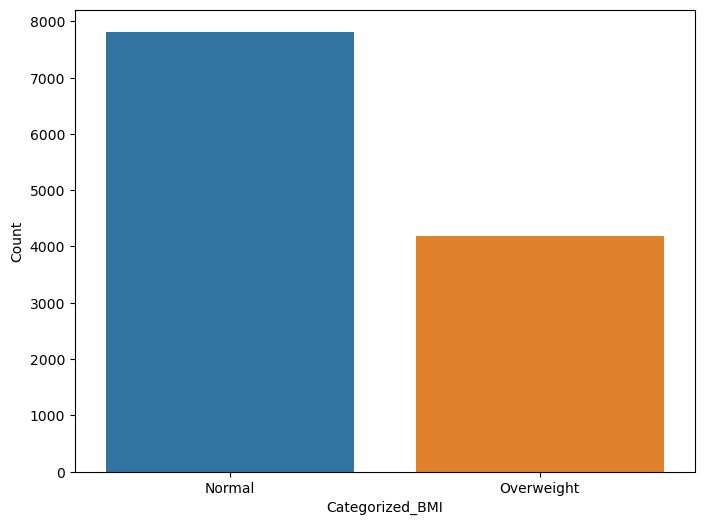

In [45]:
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]

#ds["Categorized_BMI"] = ds["Categorized_BMI").astype("object")

plt.rcParams["figure.figsize"] = 8,6 
sns.barplot(data = ds, x = "Categorized_BMI",y = "Count")

In [47]:
ds =exercise_train_data[['Gender', "Categorized_BMI"]].value_counts().reset_index().sort_values(by = ['Gender', "Categorized_BMI"])

ds.columns = ['Gender', "Categorized_BMI","Count"]

ds

Gender Categorized_BMI  Count
0  female          Normal   5572
3  female      Overweight    496
2    male          Normal   2247
1    male      Overweight   3685

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

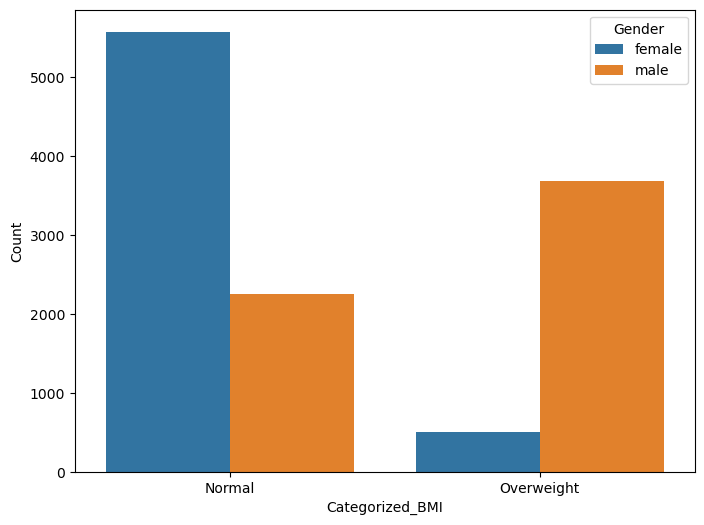

In [49]:
plt.rcParams["figure.figsize"] = 8,6

sns.barplot(data = ds, x = "Categorized_BMI", y = "Count", hue ="Gender")


In [50]:
# Counting values for 'age_groups' and 'Categorized_BMI'
ds = (exercise_train_data[["age_groups", "Categorized_BMI"]]
      .value_counts()
      .reset_index()
      .sort_values(by=["age_groups", "Categorized_BMI"]))

# Assign correct column names
ds.columns = ["age_groups", "Categorized_BMI", "Count"]

# Display the result
ds


age_groups Categorized_BMI  Count
0        Young          Normal   4369
2        Young      Overweight   1660
1  Middle-Aged          Normal   2197
3  Middle-Aged      Overweight   1338
4          old          Normal   1253
5          old      Overweight   1183

In [51]:
print(ds.columns)

Index(['age_groups', 'Categorized_BMI', 'Count'], dtype='object')


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

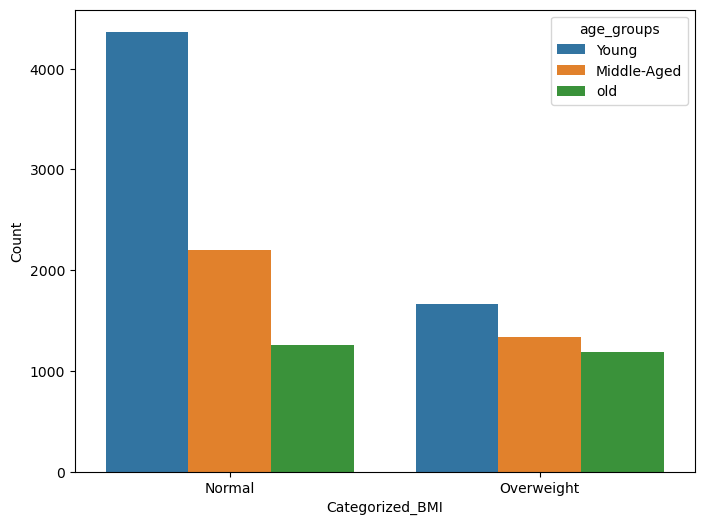

In [52]:
plt.rcParams["figure.figsize"] = (8, 6)

sns.barplot(data=ds, x='Categorized_BMI', y='Count', hue='age_groups')

In [54]:
fig = px.scatter(exercise_train_data, x = "Duration", y = 'Body_Temp', size = "Calories")

fig.update_layout(

width=700, height=450,

)

fig.show()

<Axes: >

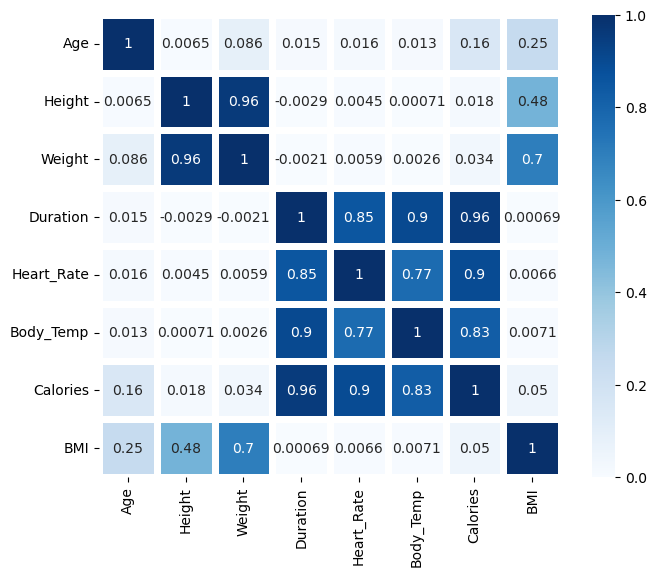

In [55]:

plt.rcParams["figure.figsize"] = (8, 6)

# Select only numeric columns for correlation
corr = exercise_train_data.select_dtypes(include=["number"]).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, square=True, linewidth=5, vmin=0, vmax=1, cmap="Blues")



In [57]:
exercise_train_data = exercise_train_data[["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]
exercise_test_data =  exercise_test_data[["Gender", "Age", "BMI" ,"Duration", "Heart_Rate", "Body_Temp", "Calories"]]

exercise_train_data = pd.get_dummies (exercise_train_data, drop_first = True)

exercise_test_data = pd.get_dummies(exercise_test_data, drop_first=True)

In [58]:
x_train = exercise_train_data.drop("Calories", axis = 1)

y_train  = exercise_train_data["Calories"]

x_test = exercise_test_data.drop("Calories", axis = 1)

y_test = exercise_test_data["Calories"]

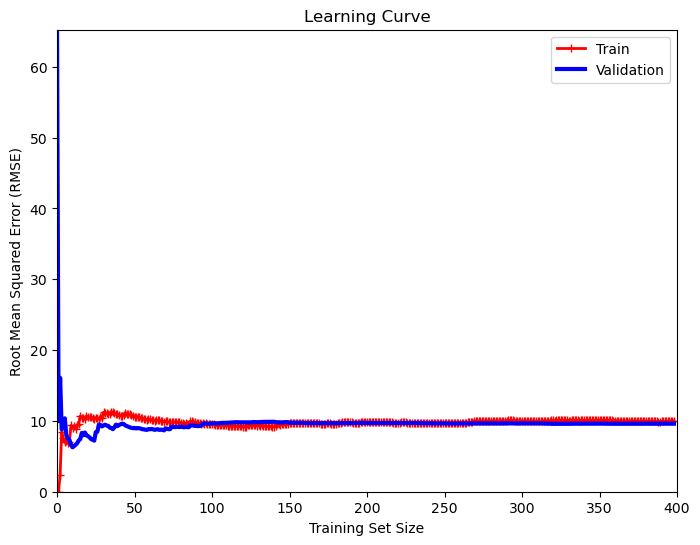

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data (Replace with actual dataset)
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the learning curve
def plot_learning_curve(model):
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):  # Use actual dataset size
        model.fit(X_train[:m], y_train[:m])  # Train model on subset

        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test[:m])

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test[:m], y_val_predict))

    # Plot Learning Curve
    plt.figure(figsize=(8, 6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.xlim([0, len(X_train)])
    plt.ylim([0, max(np.sqrt(train_errors) + np.sqrt(val_errors))])  # Auto-scale Y-axis
    plt.legend()
    plt.show()

# Initialize Linear Regression model
linreg = LinearRegression()

# Plot learning curve
plot_learning_curve(linreg)


In [60]:
print(x_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,) or (n_samples, 1)

(12000, 6)
(400,)


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic regression data (Replace with actual data)
X, y = make_regression(n_samples=12000, n_features=1, noise=10, random_state=42)

# Split data correctly
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train is correctly shaped
y_train = y_train.ravel()

# Check shapes before training
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Train Linear Regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Make predictions
linreg_prediction = linreg.predict(x_test)

# Print Mean Squared Error
mse = mean_squared_error(y_test, linreg_prediction)
print(f"Mean Squared Error: {mse}")


x_train shape: (9600, 1)
y_train shape: (9600,)
Mean Squared Error: 103.89922259506672


In [62]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

linreg_prediction = linreg.predict(X_test)

In [63]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"linreg_prediction shape: {linreg_prediction.shape}")


X_test shape: (100, 1)
y_test shape: (2400,)
linreg_prediction shape: (100,)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
y_test = y_test.reshape(-1, 1)

In [66]:
from sklearn.model_selection import train_test_split

# Ensure correct split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (9600, 1)
y_train shape: (9600,)
X_test shape: (2400, 1)
y_test shape: (2400,)


In [67]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_prediction = linreg.predict(X_test)  # Now it should match y_test


In [68]:
print("Linear Regression Mean Absolute Error (MAE): ", round(metrics.mean_absolute_error(y_test, linreg_prediction), 2))

print("Linear Regression Mean Squared Error (MSE): ", round(metrics.mean_squared_error(y_test, linreg_prediction), 2))

print("Linear Regression Root Mean Squared Error (RMSE): ", round(np.sqrt(metrics.mean_squared_error(y_test, linreg_prediction)), 2))

Linear Regression Mean Absolute Error (MAE):  8.09
Linear Regression Mean Squared Error (MSE):  103.9
Linear Regression Root Mean Squared Error (RMSE):  10.19


In [69]:
random_reg = RandomForestRegressor(n_estimators = 1000, max_features = 3, max_depth = 6)

random_reg.fit(X_train, y_train)

random_reg_prediction = random_reg.predict(X_test)

In [70]:
print("Random Forest Mean Absolute Error(MAE): ",round(metrics.mean_absolute_error(y_test, random_reg_prediction), 2))

print("Random Forest Mean Squared Error(MSE): ",round(metrics.mean_squared_error(y_test , random_reg_prediction), 2))

print("Random Forest Root Mean Squared Error(RMSE): " ,round(np.sqrt(metrics.mean_squared_error(y_test, random_reg_prediction)),2))

Random Forest Mean Absolute Error(MAE):  8.16
Random Forest Mean Squared Error(MSE):  106.21
Random Forest Root Mean Squared Error(RMSE):  10.31


In [71]:
exercise_train_data.iloc[32]

Age             23.00
BMI             24.88
Duration        27.00
Heart_Rate     102.00
Body_Temp       40.30
Calories       140.00
Gender_male      1.00
Name: 5897, dtype: float64